In [36]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Navigate to project route
if not os.getcwd().endswith('/show-us-the-data'):
    os.chdir('../..')
    os.getcwd()

In [4]:
res_path = 'models/weights/'

In [5]:
os.listdir(res_path)

['SciBERT_Finetuned_3Eps',
 'BERT_FINETUNED_5EPS.zip',
 'SciBERT_Finetuned_4Eps',
 'SciBERT_Finetuned_5Eps',
 'SciBERT_Finetuned_1Eps',
 'SciBERT_Finetuned.zip',
 'BERT_FINETUNED_5EPS',
 'SciBERT_Finetuned_2Eps']

In [6]:
# Read metrics from storage

metrics = []

for ep in range(1,5+1):
    filename = f'SciBERT_Finetuned_{ep}Eps/metrics.json'
    with open(res_path+filename, 'r') as f:
        metrics.append(json.load(f))

In [7]:
metrics[0]

{'ent_type': {'correct': 12925,
  'incorrect': 0,
  'partial': 0,
  'missed': 287,
  'spurious': 4919,
  'possible': 13212,
  'actual': 17844,
  'precision': 0.7243331091683479,
  'recall': 0.9782773236451711,
  'f1': 0.8323673364245234},
 'partial': {'correct': 12915,
  'incorrect': 0,
  'partial': 10,
  'missed': 287,
  'spurious': 4919,
  'possible': 13212,
  'actual': 17844,
  'precision': 0.7240529029365613,
  'recall': 0.9778988798062368,
  'f1': 0.8320453374549202},
 'strict': {'correct': 12915,
  'incorrect': 10,
  'partial': 0,
  'missed': 287,
  'spurious': 4919,
  'possible': 13212,
  'actual': 17844,
  'precision': 0.7237726967047747,
  'recall': 0.9775204359673024,
  'f1': 0.8317233384853169},
 'exact': {'correct': 12915,
  'incorrect': 10,
  'partial': 0,
  'missed': 287,
  'spurious': 4919,
  'possible': 13212,
  'actual': 17844,
  'precision': 0.7237726967047747,
  'recall': 0.9775204359673024,
  'f1': 0.8317233384853169},
 'ordinary': {'accuracy': 0.9973686062457324,
 

In [46]:
def normalize(l):
    """ Normalize to range [0.0, 1.0] """
    l_max = max(l)
    l_min = min(l)
    l = [(el - l_min) / (l_max - l_min) for el in l]
    return l

In [53]:
def read_metrics(keys, norm=True):
    """ Read metric denoted by keys over all epochs """
    m = [epoch_metrics[keys[0]][keys[1]] for epoch_metrics in metrics]
    if norm:
        m = normalize(m)
    return m

In [85]:
def read_ordinary_f1(norm=True):
    b = read_metrics(('ordinary','f1_B'), norm=False)
    i = read_metrics(('ordinary','f1_I'), norm=False)
    o = read_metrics(('ordinary','f1_O'), norm=False)
    f1 = [(_b*_i*_o)/3 for _b,_i,_o in zip(*[b,i,o])]
    if norm:
        f1 = normalize(f1)
    return f1

In [90]:
# Transform to epoch based format
submission_scores = read_metric(('ordinary','submission'))
ordinary_f1_B = read_metrics(('ordinary','f1_B'))
ordinary_f1_I = read_metrics(('ordinary','f1_I'))
ordinary_f1_O = read_metrics(('ordinary','f1_O'))
ordinary_f1 = read_ordinary_f1()
adv_precision = read_metrics(('exact','precision'))
adv_recall = read_metrics(('exact','recall'))
adv_f1 = read_metrics(('exact','f1'))

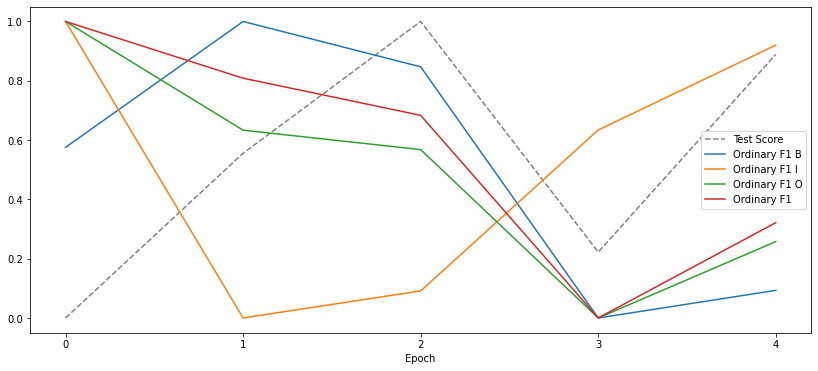

In [118]:
plt.figure(figsize=(14,6))
plt.plot(submission_scores, label='Test Score', linestyle='--', color='grey')
plt.plot(ordinary_f1_B, label='Ordinary F1 B')
plt.plot(ordinary_f1_I, label='Ordinary F1 I')
plt.plot(ordinary_f1_O, label='Ordinary F1 O')
plt.plot(ordinary_f1, label='Ordinary F1')
#plt.plot(adv_precision, label='Advanced Precision')
#plt.plot(adv_recall, label='Advanced Recall')
#plt.plot(adv_f1, label='Advanced F1')
plt.legend()
plt.xlabel('Epoch')
plt.xticks(range(5))
plt.show()

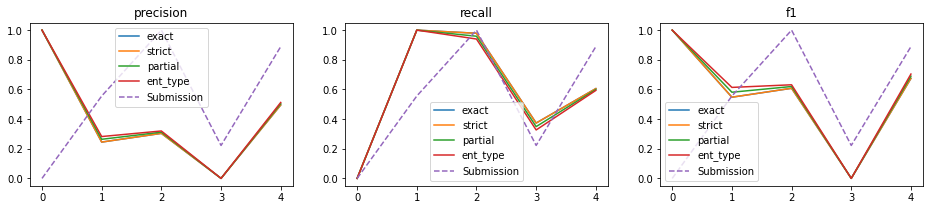

In [121]:
# Plot differences in types of advanced metrics
plt.figure(figsize=(16,3))
for i, metric_name in enumerate(['precision', 'recall', 'f1']):
    plt.subplot(1,3,i+1)
    plt.title(metric_name)
    for score_type in ['exact', 'strict', 'partial', 'ent_type']:
        metric = read_metrics((score_type, metric_name), norm=True)
        plt.plot(metric, label=score_type)
    plt.plot(read_metric(('ordinary','submission'), norm=True), label='Submission', linestyle='--')
    plt.legend()

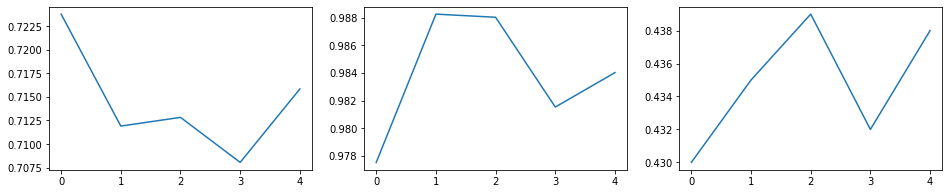

In [34]:
plt.figure(figsize=(16,3))

plt.subplot(131)
plt.plot(adv_precision, label='Advanced Precision')
plt.subplot(132)
plt.plot(adv_recall, label='Advanced Recall')
plt.subplot(133)
plt.plot(submission_scores, label='Test Score')
plt.show()